<a href="https://colab.research.google.com/github/LiTaokui/TensorFlow-Example/blob/main/Example01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**In this case, I'm trying to build a neural network to predict the strength of concrete. Let's get started!!!**

In [1]:
# import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read in the datasets
concrete = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/concrete.csv")
concrete

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [3]:
concrete["water"], concrete["age"]

(0       162.0
 1       162.0
 2       228.0
 3       228.0
 4       192.0
         ...  
 1025    179.6
 1026    196.0
 1027    192.7
 1028    175.6
 1029    200.6
 Name: water, Length: 1030, dtype: float64, 0        28
 1        28
 2       270
 3       365
 4       360
        ... 
 1025     28
 1026     28
 1027     28
 1028     28
 1029     28
 Name: age, Length: 1030, dtype: int64)

In [5]:
# let's try one-hot encode our dataframe so it's all numbers
concrete_one_hot = pd.get_dummies(concrete)
concrete_one_hot.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
# create X & y values (features and labels)
X = concrete_one_hot.drop("strength", axis=1) # this means everything but "strength"
y = concrete_one_hot["strength"] # this means only "strength"

In [7]:
# view X
X.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [8]:
# view y
y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: strength, dtype: float64

In [9]:
# create training and test sets ( 80% for training, 20% for testing )
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1030, 824, 206)

In [10]:
0.2*1030

206.0

In [11]:
X_train

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
995,158.6,148.9,116.0,175.1,15.0,953.3,719.7,28
507,424.0,22.0,132.0,178.0,8.5,822.0,750.0,28
334,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,3
848,252.0,97.0,76.0,194.0,8.0,835.0,821.0,28
294,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,3
...,...,...,...,...,...,...,...,...
87,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,3
330,246.8,0.0,125.1,143.3,12.0,1086.8,800.9,14
466,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,100
121,475.0,118.8,0.0,181.1,8.9,852.1,781.5,28


### **Model_1**

In [13]:
# build a neural network
tf.random.set_seed(42)

# 1. create a model
concrete_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. compile the model
concrete_model.compile(loss=tf.keras.losses.mae,
            optimizer=tf.keras.optimizers.Adam(),
            metrics=["mae"])

# 3. fit the model
concrete_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
26/26 [==============================] - 1s 2ms/step - loss: 90.0917 - mae: 90.0917
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 69.1328 - mae: 69.1328
Epoch 3/100
26/26 [==============================] - 0s 2ms/step - loss: 61.2525 - mae: 61.2525
Epoch 4/100
26/26 [==============================] - 0s 2ms/step - loss: 54.7891 - mae: 54.7891
Epoch 5/100
26/26 [==============================] - 0s 2ms/step - loss: 48.5576 - mae: 48.5576
Epoch 6/100
26/26 [==============================] - 0s 2ms/step - loss: 43.6998 - mae: 43.6998
Epoch 7/100
26/26 [==============================] - 0s 2ms/step - loss: 37.4349 - mae: 37.4349
Epoch 8/100
26/26 [==============================] - 0s 2ms/step - loss: 32.4662 - mae: 32.4662
Epoch 9/100
26/26 [==============================] - 0s 2ms/step - loss: 28.3338 - mae: 28.3338
Epoch 10/100
26/26 [==============================] - 0s 2ms/step - loss: 24.7609 - mae: 24.7609
Epoch 11/100
26/26 [===================

In [14]:
# evaluate it
concrete_model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 8.1845 - mae: 8.1845


[8.184527397155762, 8.184527397155762]

In [15]:
y_train.median(), y_train.mean()

(34.08, 35.85786407766992)

Now, let's try to **improve** our model!

1.Add an extra layer

2.Train for longer

3.Add an activation function(ReLU)

### **model_2**

In [16]:
# add an extra layers

# set random seed
tf.random.set_seed(42)

# 1. create the model
concrete_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1)
])

# 2. compile the model
concrete_model_2.compile(loss=tf.losses.mae,
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["mae"])

# 3. fit the model
concrete_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
26/26 [==============================] - 1s 4ms/step - loss: 24.0481 - mae: 24.0481
Epoch 2/100
26/26 [==============================] - 0s 3ms/step - loss: 12.2280 - mae: 12.2280
Epoch 3/100
26/26 [==============================] - 0s 4ms/step - loss: 8.9007 - mae: 8.9007
Epoch 4/100
26/26 [==============================] - 0s 4ms/step - loss: 8.9502 - mae: 8.9502
Epoch 5/100
26/26 [==============================] - 0s 4ms/step - loss: 9.2697 - mae: 9.2697
Epoch 6/100
26/26 [==============================] - 0s 4ms/step - loss: 8.5281 - mae: 8.5281
Epoch 7/100
26/26 [==============================] - 0s 3ms/step - loss: 10.2962 - mae: 10.2962
Epoch 8/100
26/26 [==============================] - 0s 4ms/step - loss: 9.3373 - mae: 9.3373
Epoch 9/100
26/26 [==============================] - 0s 4ms/step - loss: 8.9791 - mae: 8.9791
Epoch 10/100
26/26 [==============================] - 0s 4ms/step - loss: 8.7431 - mae: 8.7431
Epoch 11/100
26/26 [==============================] -

In [17]:
# evaluate the model
concrete_model_2.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 10.4557 - mae: 10.4557


[10.455698013305664, 10.455698013305664]

Seems like overfitting, not good...

### **model_3**

In [20]:
# train for longer

# set random seed
tf.random.set_seed(42)

# 1. create the model
concrete_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. compile the model
concrete_model_3.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["mae"])

# 3. fit the model
history = concrete_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
26/26 [==============================] - 1s 3ms/step - loss: 90.0945 - mae: 90.0945
Epoch 2/200
26/26 [==============================] - 0s 3ms/step - loss: 18.5600 - mae: 18.5600
Epoch 3/200
26/26 [==============================] - 0s 3ms/step - loss: 9.8756 - mae: 9.8756
Epoch 4/200
26/26 [==============================] - 0s 4ms/step - loss: 9.8542 - mae: 9.8542
Epoch 5/200
26/26 [==============================] - 0s 3ms/step - loss: 9.9471 - mae: 9.9471
Epoch 6/200
26/26 [==============================] - 0s 3ms/step - loss: 9.0329 - mae: 9.0329
Epoch 7/200
26/26 [==============================] - 0s 2ms/step - loss: 10.0010 - mae: 10.0010
Epoch 8/200
26/26 [==============================] - 0s 2ms/step - loss: 9.0662 - mae: 9.0662
Epoch 9/200
26/26 [==============================] - 0s 2ms/step - loss: 10.2144 - mae: 10.2144
Epoch 10/200
26/26 [==============================] - 0s 2ms/step - loss: 11.7636 - mae: 11.7636
Epoch 11/200
26/26 [=============================

In [21]:
# evaluate it
concrete_model_3.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 7.8272 - mae: 7.8272


[7.827218532562256, 7.827218532562256]

This one is the best among three of them!

Text(0.5, 0, 'epochs')

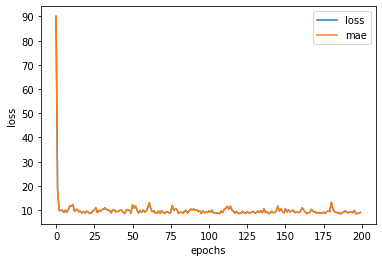

In [22]:
# plot history
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

How about preprocessing the data(**normalization** and **standardization**)?